# Вебинар № 4. Обучение с учителем в Scikit-Learn

![img/11.gif](img/11.gif.mp4)

In [1]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams.update({'font.size': 14})
sns.set(rc={'figure.figsize':(10, 8)})

In [2]:
PREPARED_DATASET_PATH = '../prepared/housing_prepared.csv'
TRAIN_DATASET_PATH = '../datasets/housing_train.csv'
SCALER_FILE_PATH = 'scaler.pkl'
MODEL_FILE_PATH = 'model.pkl' 

# Load Data

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - количество бывших владельцев
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

In [3]:
df = pd.read_csv(PREPARED_DATASET_PATH)
display(df.head())
print(df.shape)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


(20640, 15)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 15 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
<1H OCEAN             20640 non-null int64
INLAND                20640 non-null int64
ISLAND                20640 non-null int64
NEAR BAY              20640 non-null int64
NEAR OCEAN            20640 non-null int64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.4+ MB


In [5]:
df.drop(columns ='ocean_proximity', inplace=True)

In [6]:
df.shape

(20640, 14)

# StandardScaler

![img/normalization.png](img/normalization.png)

In [7]:
var_feats = list(df.select_dtypes(include='float64').columns[:-1])
print(var_feats)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


In [8]:
df[var_feats].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


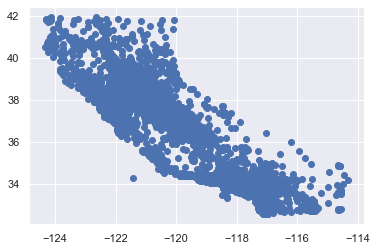

In [9]:
plt.scatter(x=df['longitude'], y=df['latitude']);

In [10]:
scaler = StandardScaler()
scaled_feats = scaler.fit_transform(df[var_feats])

In [11]:
df[var_feats] = pd.DataFrame(scaled_feats, columns=var_feats)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.328084,1.052685,0.998343,-0.804819,-0.972476,-0.978955,-0.977033,2.344766,452600.0,0,0,0,1,0
1,-1.323093,1.043321,-0.620471,2.045890,1.357143,0.878259,1.669961,2.332238,358500.0,0,0,0,1,0
2,-1.333076,1.038639,1.888691,-0.535746,-0.827024,-0.823518,-0.843637,1.782699,352100.0,0,0,0,1,0
3,-1.338067,1.038639,1.888691,-0.624215,-0.719723,-0.768132,-0.733781,0.932968,341300.0,0,0,0,1,0
4,-1.338067,1.038639,1.888691,-0.462404,-0.612423,-0.761878,-0.629157,-0.012881,342200.0,0,0,0,1,0


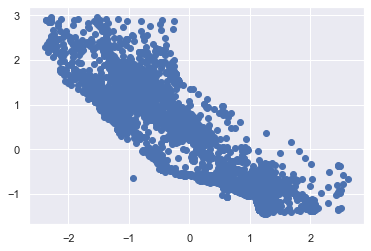

In [12]:
plt.scatter(x=df['longitude'], y=df['latitude']);

In [13]:
df.to_csv(TRAIN_DATASET_PATH, index=False, encoding='utf-8')

---

# train-test split

In [44]:
y = df['median_house_value'].values
X = df.drop('median_house_value', axis=1).values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=21)

In [16]:
X_train.shape

(14448, 13)

---

# Linear Regression

In [50]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
y_pred_tr = lr_model.predict(X_train)
print(r2_score(y_train, y_pred_tr))

0.6431859468526666


In [52]:
y_pred_ts = lr_model.predict(X_test)
print(r2_score(y_test, y_pred_ts))

0.6343160387847974


---

### Cross-val score

![cross_validation.png](img/cross_validation.png)

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Инициализируем валидацию
kfold = KFold(n_splits=5, random_state=21)

# Получаем r2 на всех фолдах
results = cross_val_score(lr_model, X, y, cv=kfold, scoring='r2') 
print(results)
print(results.mean())

[0.49271515 0.50353195 0.5952347  0.48879895 0.69364161]
0.5547844717686613


---

# RandomForestRegressor

В качестве критерия разбиения - дисперсия вокруг среднего.  
Минимизируя дисперсию вокруг среднего, мы ищем признаки, разбивающие выборку таким образом, что значения целевого признака в каждом листе примерно равны.

In [21]:
rf_model = RandomForestRegressor(random_state = 21)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=21, verbose=0,
                      warm_start=False)

In [22]:
y_pred_tr = rf_model.predict(X_train)
print(r2_score(y_train, y_pred_tr))

0.9643045845334844


In [23]:
y_pred_ts = rf_model.predict(X_test)
print(r2_score(y_test, y_pred_ts))

0.8010007703511862


---

### OOB-score

![bootstrap.jpeg](img/bootstrap.jpeg)

In [24]:
rf_model = RandomForestRegressor(random_state = 21, oob_score=True)
rf_model.fit(X, y)
print(rf_model.oob_score_)

0.7240434200665755


# Feature importances

In [25]:
rf_model.feature_importances_

array([1.10509177e-01, 1.05831359e-01, 5.01941055e-02, 2.42500740e-02,
       2.06330465e-02, 2.95974566e-02, 1.98073141e-02, 4.83353751e-01,
       4.17198943e-03, 1.44044744e-01, 1.77854772e-04, 1.09003344e-03,
       6.33909578e-03])

In [26]:
# Функция создает датафрейм вида признак/его важность для прогноза
def feat_imp(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df


# Функция для построения графика важности признаков
def feat_imp_plot(feat_imp, title):
    feat_imp.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = feat_imp, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [27]:
features = list(df.drop('median_house_value', axis=1).columns)
print(features)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']


* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - количество бывших владельцев
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

In [28]:
base_imp = feat_imp(features, rf_model.feature_importances_)
base_imp

,feature,feature_importance
0,median_income,0.483354
1,INLAND,0.144045
2,longitude,0.110509
3,latitude,0.105831
4,housing_median_age,0.050194
5,population,0.029597
6,total_rooms,0.024250
7,total_bedrooms,0.020633
8,households,0.019807
9,NEAR OCEAN,0.006339


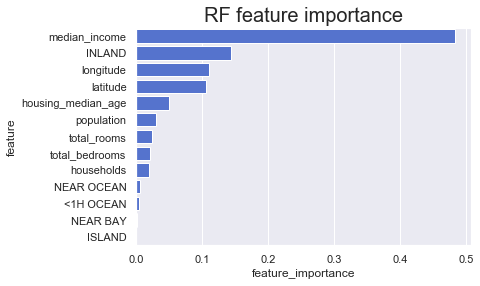

In [29]:
feat_imp_plot(base_imp, 'RF feature importance')

# Поиск оптимальных параметров модели. GridSearch

In [31]:
# Сделаем инициализацию параметров, по которым хотим сделать полный перебор
parameters = {
    'n_estimators': [100, 200, 500],
    'max_features': [4, 7, 10], 
    'min_samples_leaf': [1, 3, 5], 
    'max_depth': [5, 10, None]
}

rfc = RandomForestRegressor(random_state=21, 
                             n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, scoring='r2', n_jobs=-1, cv=3, verbose=1)
gcv.fit(X, y)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  4.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=True, random_state=21,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [5, 10, None], 'max_featu

![img/75_yrs_later.JPG](img/75_yrs_later.JPG)

In [32]:
print('Лучшие параметры:', gcv.best_params_)
print('Лучший результат:', gcv.best_score_)

Лучшие параметры: {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 3, 'n_estimators': 500}
Лучший результат: 0.6313067748688598


In [33]:
# лучшая модель
gcv.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=True, random_state=21, verbose=0,
                      warm_start=False)

In [34]:
rf_model = gcv.best_estimator_

rf_model.fit(X_train, y_train)
print(r2_score(y_train, y_pred_tr))
print(r2_score(y_test, y_pred_ts))

0.9643045845334844
0.8010007703511862


---

### Save model

In [87]:
import pickle

# сохраняем модель на будущее
pickle.dump(rf_model, open(MODEL_FILE_PATH, 'wb'))
#...
#...
#...

![img/later.jpg](img/later.jpg)

In [88]:
# модель загружена и готова прогнозировать!
loaded_model = pickle.load(open(MODEL_FILE_PATH, 'rb')) 
result = loaded_model.score(X_test, y_test) 
print(result)

0.8122733588296163
